In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose

# 한글 깨짐
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = 15,8
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [3]:
# read excel file
df = pd.read_excel('./data/도로교통공단_일자별 시군구별 교통사고 건수.xlsx')

In [4]:
df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,1,서울,종로구,1,0,0,1,0
1,1,1,서울,중구,1,0,0,2,0
2,1,1,서울,용산구,2,0,0,5,0
3,1,1,서울,성동구,1,0,0,1,0
4,1,1,서울,동대문구,3,0,1,2,0


In [5]:
# date format 변경
a = range(0, len(df))
b = range(0, len(df))

df['dt'] = pd.DataFrame(list(map(lambda x, y: '2020-'+ str(df['발생월'][x]) + '-' + str(df['발생일'][y]), a, b)))
df['ym'] = pd.DataFrame(list(map(lambda x: '2020-'+ str(df['발생월'][x]), a)))

df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-1-1,2020-1
1,1,1,서울,중구,1,0,0,2,0,2020-1-1,2020-1
2,1,1,서울,용산구,2,0,0,5,0,2020-1-1,2020-1
3,1,1,서울,성동구,1,0,0,1,0,2020-1-1,2020-1
4,1,1,서울,동대문구,3,0,1,2,0,2020-1-1,2020-1


In [6]:
df['dt']  = df['dt'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))
df['ym']  = df['ym'].map(lambda x : datetime.strptime(x, '%Y-%m').strftime('%Y-%m'))
df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-01-01,2020-01
1,1,1,서울,중구,1,0,0,2,0,2020-01-01,2020-01
2,1,1,서울,용산구,2,0,0,5,0,2020-01-01,2020-01
3,1,1,서울,성동구,1,0,0,1,0,2020-01-01,2020-01
4,1,1,서울,동대문구,3,0,1,2,0,2020-01-01,2020-01


### Boxplot

In [7]:
df.describe()

,발생월,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000
mean,6.554400,15.795710,3.510381,0.051587,1.014065,3.784676,0.328076
std,3.420461,8.786796,3.008699,0.237546,1.258949,3.903219,0.766818
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,16.000000,3.000000,0.000000,1.000000,3.000000,0.000000
75%,10.000000,23.000000,5.000000,0.000000,1.000000,5.000000,0.000000
max,12.000000,31.000000,31.000000,5.000000,15.000000,46.000000,29.000000


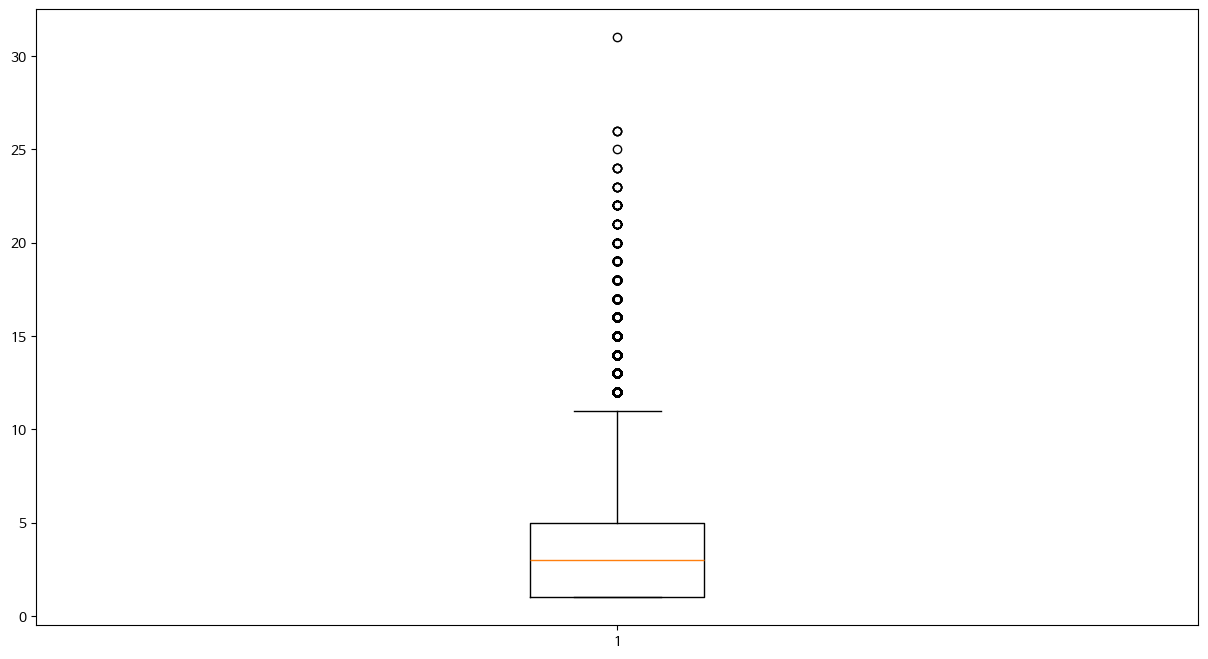

In [10]:
plt.boxplot(df['사고건수'])
plt.show()

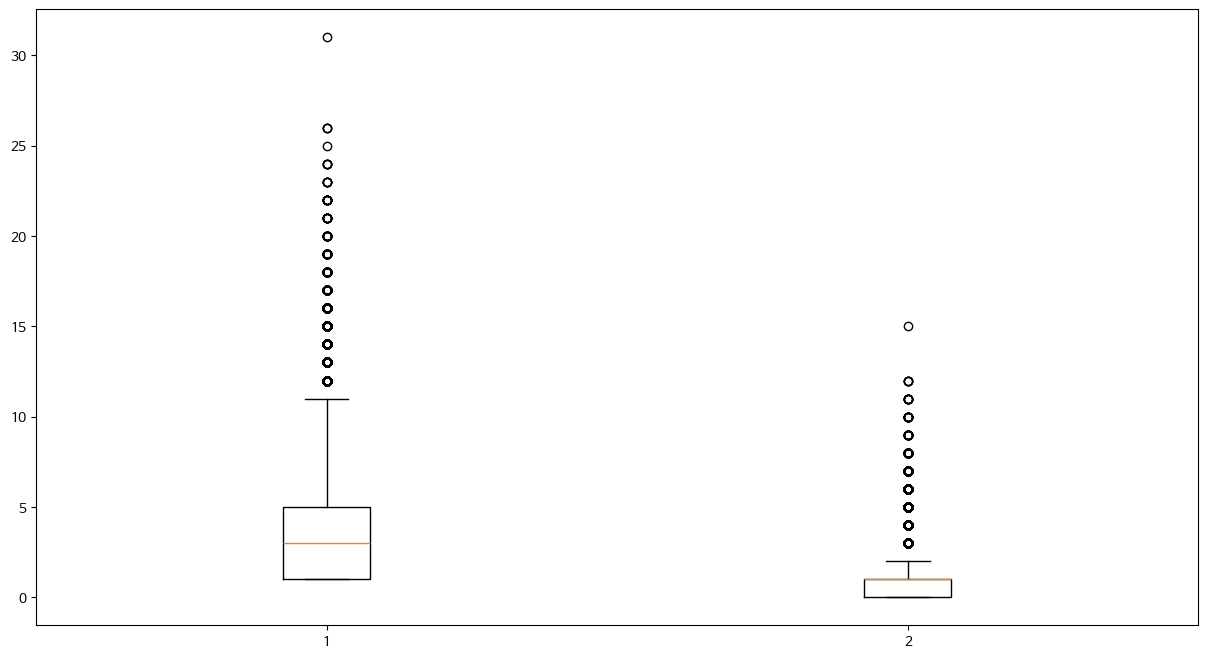

In [11]:
fig, ax = plt.subplots()
ax.boxplot([df['사고건수'], df['중상자수']])
plt.show()

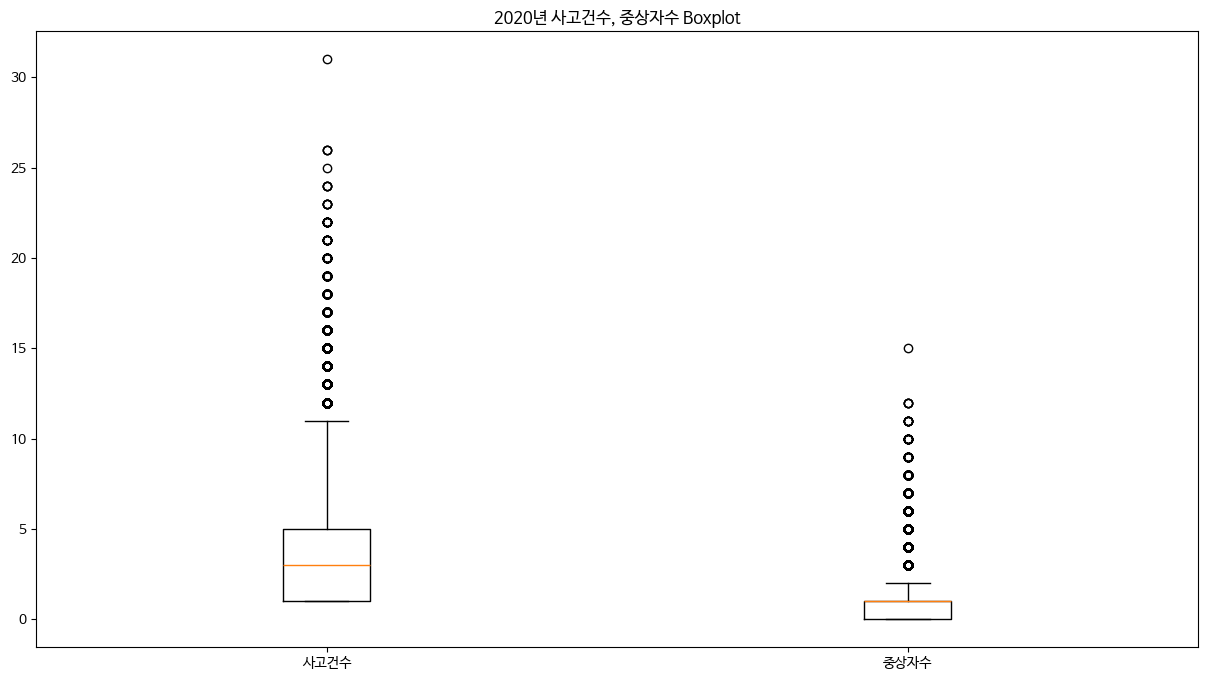

In [12]:
fig, ax = plt.subplots()
ax.boxplot([df['사고건수'], df['중상자수']])

plt.title('2020년 사고건수, 중상자수 Boxplot')
plt.xticks([1, 2], ['사고건수', '중상자수'])
plt.show()

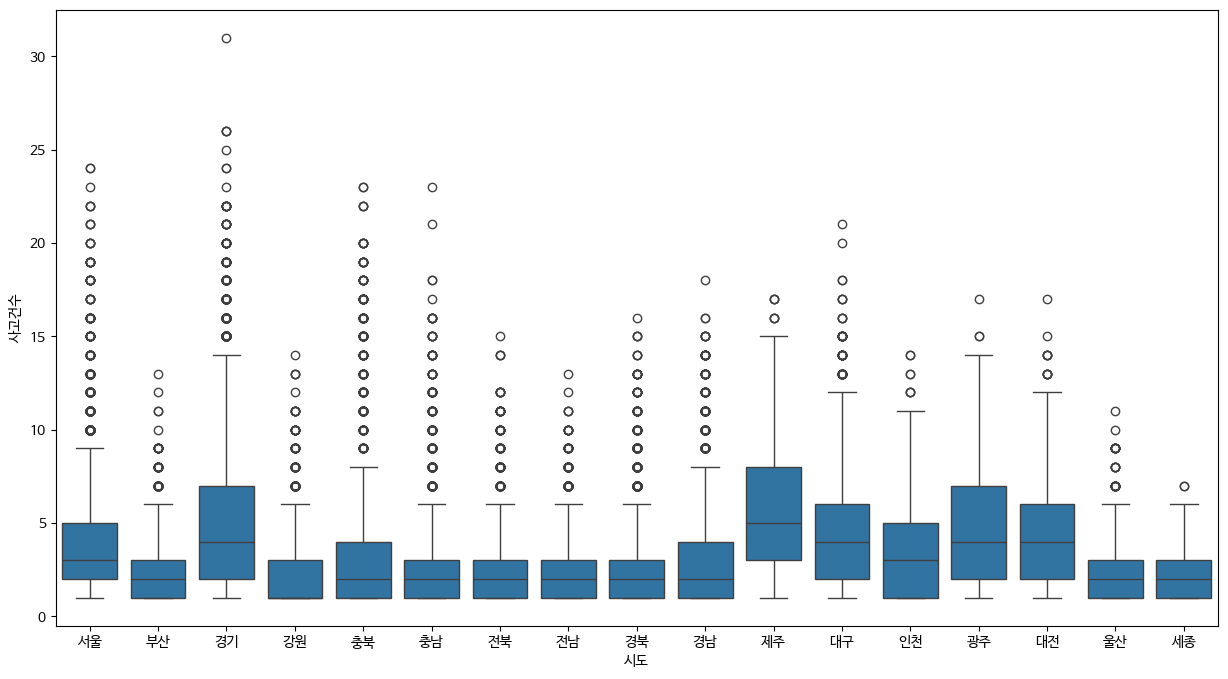

In [13]:
sns.boxplot(x='시도', y='사고건수', data=df)
plt.show()

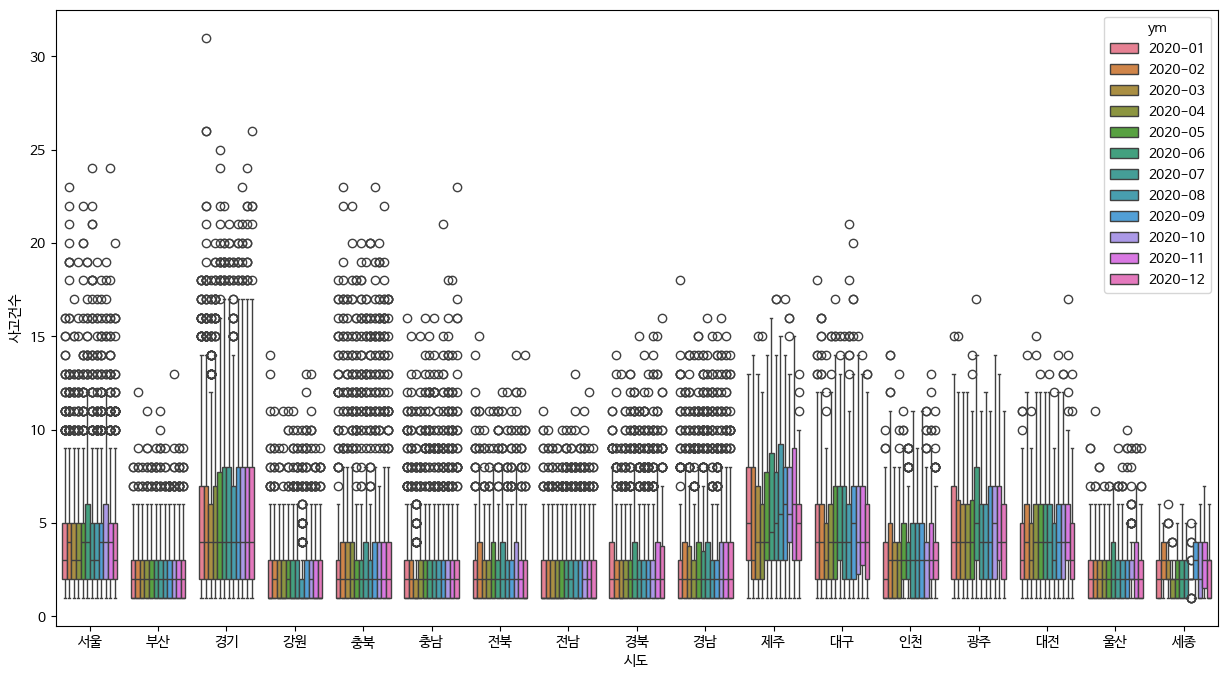

In [14]:
sns.boxplot(x='시도', y='사고건수', hue='ym', data=df)
plt.show()

/tmp/ipykernel_15125/1757769252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='시도', y='사고건수', col='ym', kind='box', palette='Set3', data=df)


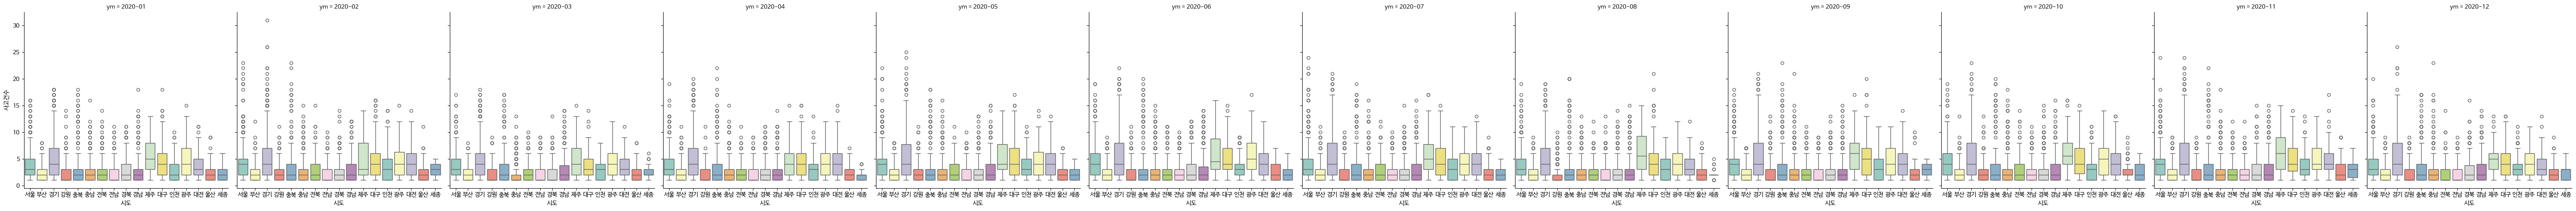

In [16]:
sns.catplot(x='시도', y='사고건수', col='ym', kind='box', palette='Set3', data=df)
plt.show()

/tmp/ipykernel_15125/720927918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='시도', y='사고건수', data=df, palette='Set3', linewidth=3, width=0.8)


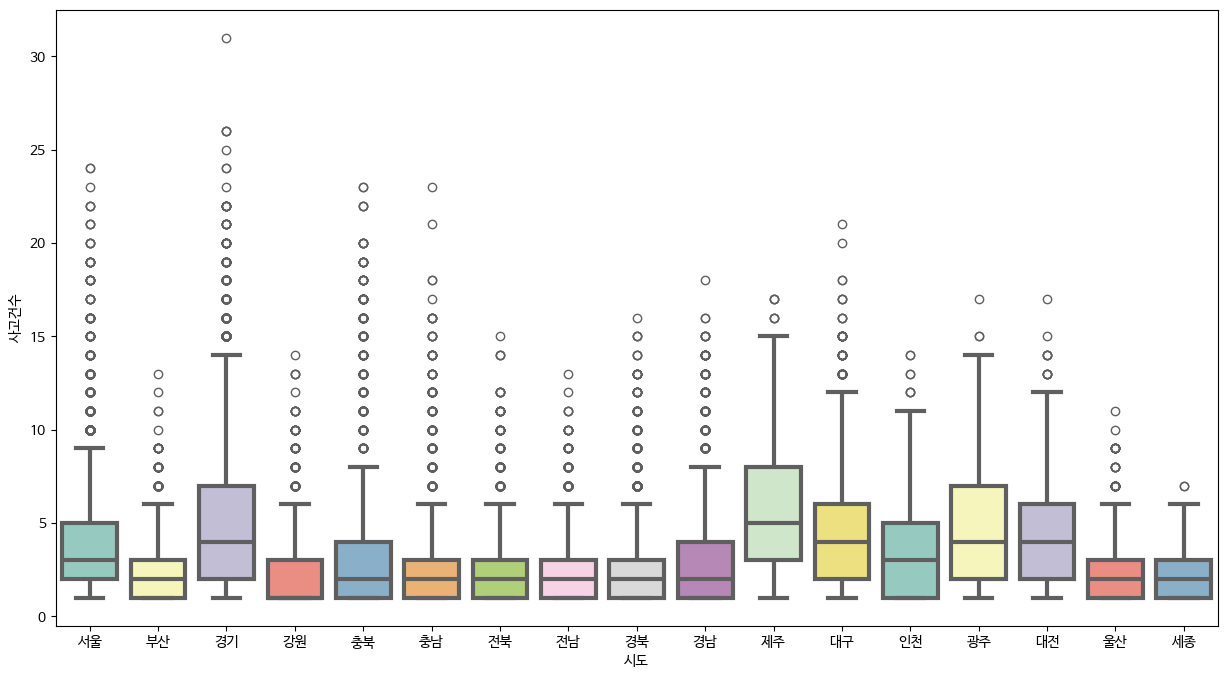

In [17]:
sns.boxplot(x='시도', y='사고건수', data=df, palette='Set3', linewidth=3, width=0.8)
plt.show()

/tmp/ipykernel_15125/38279803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='시도', y='사고건수', data=df, palette='Set3')


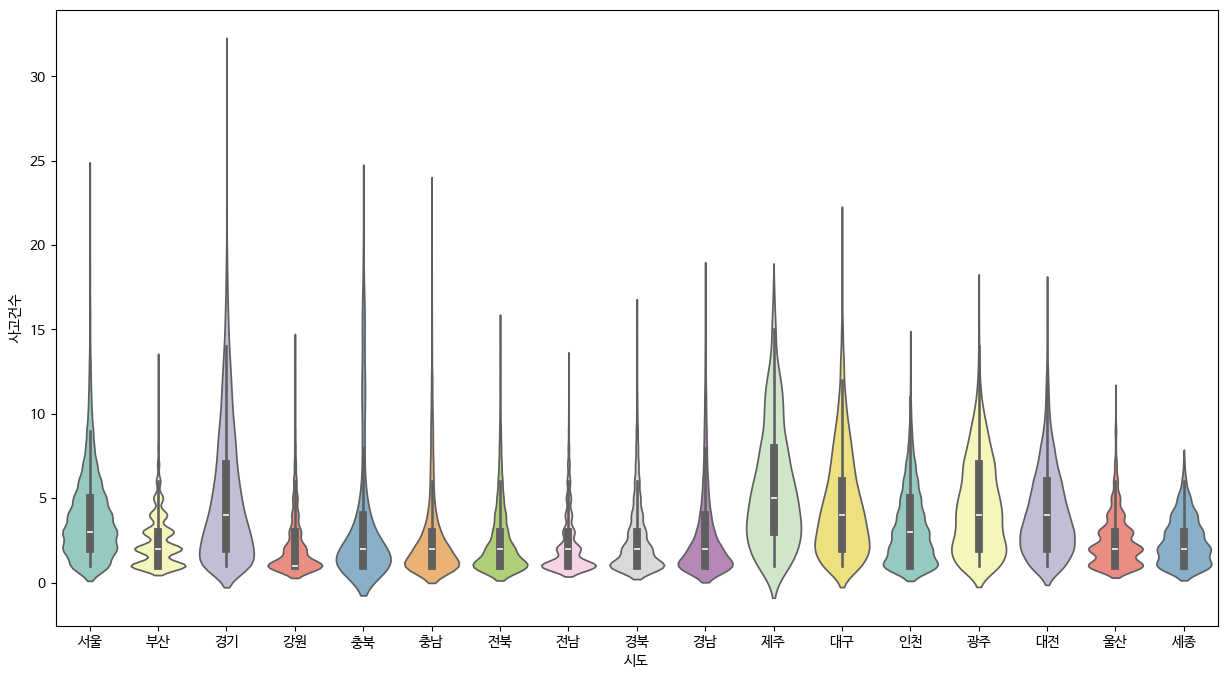

In [18]:
sns.violinplot(x='시도', y='사고건수', data=df, palette='Set3')
plt.show()